# Data Summarization and Preprocessing

## samples of raw dataset :

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('full_data.csv')
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


## General Summary :

In [42]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000
mean,43.419859,0.096165,0.055210,105.943562,28.498173,0.049789
std,22.662755,0.294848,0.228412,45.075373,6.790464,0.217531
min,0.080000,0.000000,0.000000,55.120000,14.000000,0.000000
25%,25.000000,0.000000,0.000000,77.230000,23.700000,0.000000
50%,45.000000,0.000000,0.000000,91.850000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,113.860000,32.600000,0.000000
max,82.000000,1.000000,1.000000,271.740000,48.900000,1.000000


## Variables distribution, Missing values and Statistical summaries :

In [41]:
# Import necessary libraries
import numpy as np

# Loop through each column in the DataFrame
for column in df.columns:
    print("Variable:", column)
    
    # Display distribution
    print("Distribution:")
    print(df[column].value_counts())
    print()
    
    # Display missing values
    missing_values = df[column].isnull().sum()
    print("Missing Values:", missing_values)
    print()
    
    # Check if the column is numeric
    if np.issubdtype(df[column].dtype, np.number):
        # Display statistical summaries
        print("Statistical Summaries:")
        print("Mean:", df[column].mean())
        print("Variance:", df[column].var())
        print("Mode:", df[column].mode().values[0])
        print("Median:", df[column].median())
    else:
        print("Statistical summaries are not applicable for non-numeric data.")
    
    print("-------------------------")

Variable: gender
Distribution:
Female    2907
Male      2074
Name: gender, dtype: int64

Missing Values: 0

Statistical summaries are not applicable for non-numeric data.
-------------------------
Variable: age
Distribution:
78.00    102
57.00     92
54.00     85
51.00     84
79.00     84
        ... 
1.16       3
0.48       3
0.40       2
0.08       2
0.16       1
Name: age, Length: 104, dtype: int64

Missing Values: 0

Statistical Summaries:
Mean: 43.41985946597069
Variance: 513.6004675304471
Mode: 78.0
Median: 45.0
-------------------------
Variable: hypertension
Distribution:
0    4502
1     479
Name: hypertension, dtype: int64

Missing Values: 0

Statistical Summaries:
Mean: 0.09616542862878939
Variance: 0.08693509230658834
Mode: 0
Median: 0.0
-------------------------
Variable: heart_disease
Distribution:
0    4706
1     275
Name: heart_disease, dtype: int64

Missing Values: 0

Statistical Summaries:
Mean: 0.055209797229471995
Variance: 0.052172149751384574
Mode: 0
Median: 0.0
--

## Graphs :

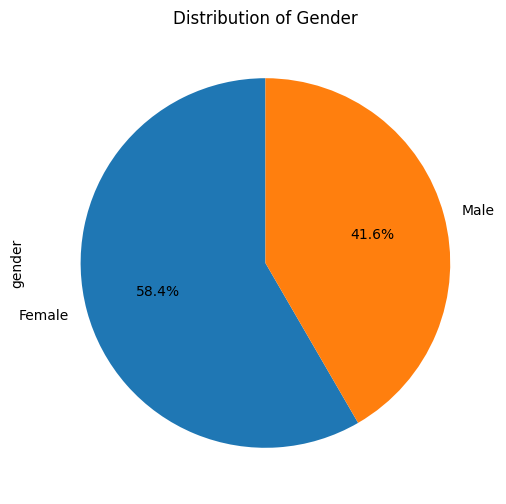

In [2]:
gender_count= df['gender'].value_counts(normalize=True) * 100
gender_count.plot.pie(autopct='%1.1f%%', figsize=(6, 6), startangle=90)
plt.title('Distribution of Gender')
plt.show()

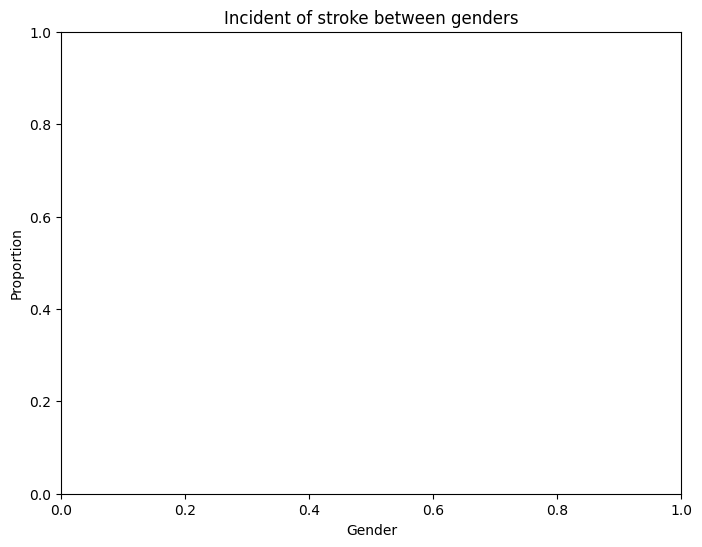

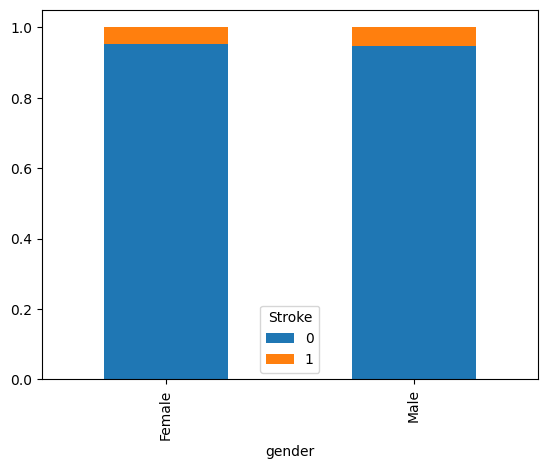

In [3]:
import matplotlib.pyplot as plt
# Plotting
plt.figure(figsize=(8, 6))
plt.title('Incident of stroke between genders')
plt.xlabel('Gender')
plt.ylabel('Proportion')

# Group by gender and stroke, calculate proportions, and plot
grouped_data = df.groupby(['gender', 'stroke']).size().unstack()
grouped_data = grouped_data.div(grouped_data.sum(axis=1), axis=0)
grouped_data.plot(kind='bar', stacked=True)
plt.legend(title='Stroke', labels=['0', '1'])
plt.show()

# Preprocessing techniques:


## Check missing value:


In [43]:
missing_value=df.isna().sum()
print(missing_value)

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64


## Check duplicated rows :

In [5]:
duplicates_count = sum(df.duplicated())
print(duplicates_count)

0


## Detect and remove outliers:

In [6]:
# Select the 'age' column
age_column = df['age']
# Calculate the mean of the 'age' column
mean_age = age_column.mean()
# Calculate the absolute differences from the mean
differences_from_mean = abs(age_column - mean_age)
# Find the index of the row with the largest difference from the mean
max_difference_index = differences_from_mean.idxmax()
# Remove the row with the largest difference from the mean
df_no_outlier_age = df.drop(max_difference_index)
data_genral = df_no_outlier_age
# Display the DataFrame after removing the row with the largest difference from the mean
print("\nDataFrame after removing the row with the largest difference from the mean:")
print(data_genral)


DataFrame after removing the row with the largest difference from the mean:
      gender   age  hypertension  heart_disease ever_married      work_type  \
0       Male  67.0             0              1          Yes        Private   
1       Male  80.0             0              1          Yes        Private   
2     Female  49.0             0              0          Yes        Private   
3     Female  79.0             1              0          Yes  Self-employed   
4       Male  81.0             0              0          Yes        Private   
...      ...   ...           ...            ...          ...            ...   
4976    Male  41.0             0              0           No        Private   
4977    Male  40.0             0              0          Yes        Private   
4978  Female  45.0             1              0          Yes       Govt_job   
4979    Male  40.0             0              0          Yes        Private   
4980  Female  80.0             1              0       

In [7]:
# Select the 'bmi' column
bmi_column = data_genral['bmi']
# Calculate the mean of the 'bmi' column
mean_bmi = bmi_column.mean()
# Calculate the absolute differences from the mean
differences_from_mean = abs(bmi_column - mean_bmi)
# Find the index of the row with the largest difference from the mean
max_difference_index = differences_from_mean.idxmax()
# Remove the row with the largest difference from the mean
df_no_outlier_bmi = data_genral.drop(max_difference_index)
data_genral= df_no_outlier_bmi
# Display the DataFrame after removing the row with the largest difference from the mean
print("\nDataFrame after removing the row with the largest difference from the mean:")
print(data_genral)


DataFrame after removing the row with the largest difference from the mean:
      gender   age  hypertension  heart_disease ever_married      work_type  \
0       Male  67.0             0              1          Yes        Private   
1       Male  80.0             0              1          Yes        Private   
2     Female  49.0             0              0          Yes        Private   
3     Female  79.0             1              0          Yes  Self-employed   
4       Male  81.0             0              0          Yes        Private   
...      ...   ...           ...            ...          ...            ...   
4976    Male  41.0             0              0           No        Private   
4977    Male  40.0             0              0          Yes        Private   
4978  Female  45.0             1              0          Yes       Govt_job   
4979    Male  40.0             0              0          Yes        Private   
4980  Female  80.0             1              0       

In [8]:
# Select the 'avg_glucose_level' column
avg_glucose_level_column = data_genral['avg_glucose_level']
# Calculate the mean of the 'avg_glucose_level' column
mean_avg_glucose_level = avg_glucose_level_column.mean()
# Calculate the absolute differences from the mean
differences_from_mean = abs(avg_glucose_level_column - mean_avg_glucose_level)
# Find the index of the row with the largest difference from the mean
max_difference_index = differences_from_mean.idxmax()
# Remove the row with the largest difference from the mean
df_no_outlier_avg_glucose_level = data_genral.drop(max_difference_index)
data_genral = df_no_outlier_avg_glucose_level
# Display the DataFrame after removing the row with the largest difference from the mean
print("\nDataFrame after removing the row with the largest difference from the mean:")
print(data_genral)


DataFrame after removing the row with the largest difference from the mean:
      gender   age  hypertension  heart_disease ever_married      work_type  \
0       Male  67.0             0              1          Yes        Private   
1       Male  80.0             0              1          Yes        Private   
2     Female  49.0             0              0          Yes        Private   
3     Female  79.0             1              0          Yes  Self-employed   
4       Male  81.0             0              0          Yes        Private   
...      ...   ...           ...            ...          ...            ...   
4976    Male  41.0             0              0           No        Private   
4977    Male  40.0             0              0          Yes        Private   
4978  Female  45.0             1              0          Yes       Govt_job   
4979    Male  40.0             0              0          Yes        Private   
4980  Female  80.0             1              0       

## Encoding :

In [35]:
from sklearn.preprocessing import LabelEncoder
from scipy import stats
le_ever_married = LabelEncoder()
le_Residence_type = LabelEncoder()
le_smoking_status = LabelEncoder()
le_work_type = LabelEncoder()

data_genral['ever_married'] = le_ever_married.fit_transform(data_genral['ever_married'])
data_genral['Residence_type'] = le_Residence_type.fit_transform(data_genral['Residence_type'])
data_genral['smoking_status'] = le_Residence_type.fit_transform(data_genral['smoking_status'])
data_genral['work_type'] = le_Residence_type.fit_transform(data_genral['work_type'])
data_genral['gender'] = le_Residence_type.fit_transform(data_genral['gender'])
print(data_genral)

      gender       age  hypertension  heart_disease  ever_married  work_type  \
0          1  0.816895             0              1             1          1   
1          1  0.975586             0              1             1          1   
2          0  0.597168             0              0             1          1   
3          0  0.963379             1              0             1          2   
4          1  0.987793             0              0             1          1   
...      ...       ...           ...            ...           ...        ...   
4976       1  0.499512             0              0             0          1   
4977       1  0.487305             0              0             1          1   
4978       0  0.548340             1              0             1          0   
4979       1  0.487305             0              0             1          1   
4980       0  0.975586             1              0             1          1   

      Residence_type  avg_glucose_level

## Normalize Data using Min-Max Scaling:

In [15]:
from sklearn.preprocessing import MinMaxScaler


columns_to_normalize = ['age']
data_to_normalize = data_genral[columns_to_normalize]
minmax_scaler = MinMaxScaler()
normalized_data_minmax = minmax_scaler.fit_transform(data_to_normalize)
data_genral[columns_to_normalize] = normalized_data_minmax
print(data_genral)

      gender       age  hypertension  heart_disease  ever_married  work_type  \
0       Male  0.816895             0              1             1          1   
1       Male  0.975586             0              1             1          1   
2     Female  0.597168             0              0             1          1   
3     Female  0.963379             1              0             1          2   
4       Male  0.987793             0              0             1          1   
...      ...       ...           ...            ...           ...        ...   
4976    Male  0.499512             0              0             0          1   
4977    Male  0.487305             0              0             1          1   
4978  Female  0.548340             1              0             1          0   
4979    Male  0.487305             0              0             1          1   
4980  Female  0.975586             1              0             1          1   

      Residence_type  avg_glucose_level

In [39]:
from sklearn.preprocessing import MinMaxScaler


columns_to_normalize = ['bmi']
data_to_normalize = data_genral[columns_to_normalize]
minmax_scaler = MinMaxScaler()
normalized_data_minmax = minmax_scaler.fit_transform(data_to_normalize)
data_genral[columns_to_normalize] = normalized_data_minmax
print(data_genral)

      gender       age  hypertension  heart_disease  ever_married  work_type  \
0          1  0.816895             0              1             1          1   
1          1  0.975586             0              1             1          1   
2          0  0.597168             0              0             1          1   
3          0  0.963379             1              0             1          2   
4          1  0.987793             0              0             1          1   
...      ...       ...           ...            ...           ...        ...   
4976       1  0.499512             0              0             0          1   
4977       1  0.487305             0              0             1          1   
4978       0  0.548340             1              0             1          0   
4979       1  0.487305             0              0             1          1   
4980       0  0.975586             1              0             1          1   

      Residence_type  avg_glucose_level

In [37]:
from sklearn.preprocessing import MinMaxScaler


columns_to_normalize = ['avg_glucose_level']
data_to_normalize = data_genral[columns_to_normalize]
minmax_scaler = MinMaxScaler()
normalized_data_minmax = minmax_scaler.fit_transform(data_to_normalize)
data_genral[columns_to_normalize] = normalized_data_minmax
print(data_genral)

      gender       age  hypertension  heart_disease  ever_married  work_type  \
0          1  0.816895             0              1             1          1   
1          1  0.975586             0              1             1          1   
2          0  0.597168             0              0             1          1   
3          0  0.963379             1              0             1          2   
4          1  0.987793             0              0             1          1   
...      ...       ...           ...            ...           ...        ...   
4976       1  0.499512             0              0             0          1   
4977       1  0.487305             0              0             1          1   
4978       0  0.548340             1              0             1          0   
4979       1  0.487305             0              0             1          1   
4980       0  0.975586             1              0             1          1   

      Residence_type  avg_glucose_level

## Feature selection :

In [45]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Separate the features (X) and the target variable (y)
X = data_genral[[ 'age','gender','bmi', 'avg_glucose_level', 'hypertension','ever_married','work_type','Residence_type','smoking_status','heart_disease']]
y = data_genral['stroke']

# Train the model
model = LogisticRegression() 
rfe = RFE(estimator=model, n_features_to_select=4)
selector = rfe.fit_transform(X, y)

#Display the selected features
selected_features = [i for i, mask in enumerate(rfe.support_)if mask]
print("selected_features:" , selected_features)


selected_features: [0, 3, 4, 9]
